In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### **[Задание 1]**

Импортируйте набор данных `stars.csv` и подготовьте рабочий датасет, состоящий из столбцов:
* Temperature
* Absolute magnitude
* Star type.

In [2]:
df = pd.read_csv('stars.csv')
features = ['Temperature',
       'Absolute magnitude', 'Star type']
df.rename(columns={'Temperature (K)': 'Temperature', 'Absolute magnitude(Mv)': 'Absolute magnitude'}, inplace=True)
df[features]

,Temperature,Absolute magnitude,Star type
0,3068,16.12,0
1,3042,16.60,0
2,2600,18.70,0
3,2800,16.65,0
4,1939,20.06,0
...,...,...,...
235,38940,-9.93,5
236,30839,-10.63,5
237,8829,-10.73,5
238,9235,-11.23,5


### **[Задание 2]**

Постройте картинку распределения звезд на основе признаков `Temperature`, `Absolute magnitude`, выделяя каждый тип звезд неповторяющимися цветами.



In [7]:
def convert2color(number):
    if number == 0:
        return "red"
    if number == 1:
        return "blue"
    if number == 2:
        return "green"
    if number == 3:
        return "violet"
    if number == 4:
        return "pink"
    return "orange"

colors =  df['Star type'].map(convert2color)

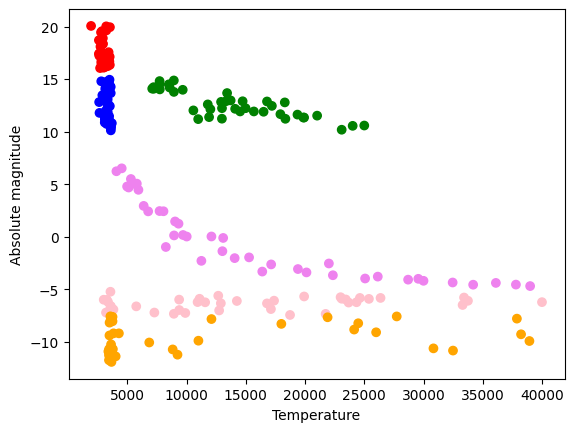

In [8]:
plt.scatter(df["Temperature"], df["Absolute magnitude"], color=colors)
plt.xlabel('Temperature')
plt.ylabel('Absolute magnitude')
plt.show()

### **[Задание 3]**

Разделите датасет на тестовую и тренировочную выборки в соотношении 0,3 на 0,7. Зафиксируйте random_state=40. Проведите перебор гиперпараметров модели knn_classifier и определите оптимальные, при которых точность (accuracy) модели будет выше 0.9.

In [9]:
data = df[["Temperature", "Absolute magnitude"]]
clast = df["Star type"]

In [15]:
from sklearn.model_selection import train_test_split

f_train, f_test, c_train, c_test = train_test_split(data, clast,
    test_size=0.3, random_state=40)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

kmeans = KNeighborsClassifier(
    n_neighbors=2,
    algorithm="brute",
    weights= 'distance',
    )

In [83]:
kmeans.fit(f_train, c_train)
y_kmeans = kmeans.predict(f_test)

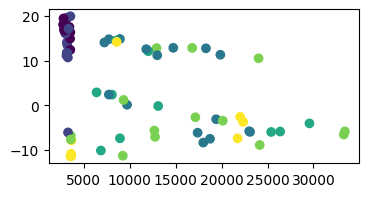

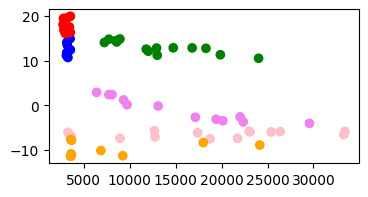

In [84]:
plt.figure(figsize=(4, 2))
plt.scatter(f_test['Temperature'], f_test['Absolute magnitude'], c = y_kmeans)
plt.show()

colors =  c_test.map(convert2color)
plt.figure(figsize=(4, 2))

plt.scatter(f_test["Temperature"], f_test["Absolute magnitude"], color=colors)
plt.show()

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(c_test, y_kmeans)

0.5138888888888888